# Большое практическое задание 2
# Классификация заемщиков линейными моделями

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Глушанина Мария Евгеньевна 

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями и градиентными методами обучения. В
задании необходимо: <br>
1. Написать на языке Python собственную реализацию линейного классификатора с произвольной функцией потерь и реализацию функции и градиента функции потерь для логистической регрессии. Реализации можно частично проверить через юнит-тесты и с помощью системы ejudge в соответствующем соревновании. <br><br> **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения. 


2. Вывести все необходимые формулы, привести выкладки в отчёте. 


3. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом в данном ноутбуке. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно. <br><br> **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать: `File -> Download as -> HTML (.html)`. Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de). Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями. <br><br> Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.


### Некоторые полезные советы
1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль knn, можно добавить ячейку с таким содержимым:
```python
%load_ext autoreload
%autoreload 2
```


2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `modules` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:
```text
tree
    ---modules
    ------__init__.py
    ------linear_model.py
    ------losses.py
    ------utils.py
    ------tests.py
    HW2_*.ipynb
```

## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии. <br>
Считайте для удобства, что $x[0] = 1$ для любого объекта, то есть $w[0] - \texttt{bias}$. <br>
Так, в выведенном вами градиенте, $\texttt{grad}[1:]$ - градиент по весам, $\texttt{grad}[0]$ - градиент по $\texttt{bias}$.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

In [2]:
grad = ((1 - sigm(-(-y * (X*w+b))))*(y*X))/len(x)


## Реализация алгоритмов (9 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализаций пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в спецификации к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)

## Эксперименты (15 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [1]:
import numpy as np, pandas as pd
import zipfile

%load_ext autoreload
%autoreload 2

# %load_ext - https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %autoreload - https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

zf = zipfile.ZipFile('data.zip') 

data = pd.read_csv(zf.open('data/application_train.csv'))
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


-1    282686
 1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Неожиданная заметка**

С этого момента предлагается некоторым образом отмечать все "неоднозначные" моменты, которые диктует вам домашка. Пример комментирования таких мест в коде - ниже. Если такие места находятся в текстовой ячейке, нужно после нее создать ячейку и прокомментировать желаемые места. Пример:

In [16]:
#*! что такое "неоднозначные" моменты?
#*! "Если такие места находятся в текстовой ячейке..." - не раскрыт случай нахождения таких мест "между строк"

Под "неоднозначными" понимается нечто, что навязывается вам домашкой, но не является по вашему мнению оптимальным / единственно правильным способом сделать / делать то или иное с точки зрения логики.

К таким моментам НЕ относятся, например: <br>
разные способы фиксация сида, способы выбрать рандомные индексы без повторений, в общем все, что "в разных случаях" делает "примерно одно и то же" и работает "примерно одинаково".

Точное количество таких моментов в домашке не определено. Вы сами решаете, что комментировать.

За проявление внимательности можно будет получить бонусные баллы за работу! <br>
За проявление вопиющей невнимательности можно будет потерять баллы за работу!

In [2]:
np.random.seed(911)

test_size = int(0.2 * data.shape[0]) #*! почему 0.2?
val_size = int(0.3 * (data.shape[0] - test_size)) #*! почему 0.3?
test_idx = np.random.choice(data.shape[0], size=test_size, replace=False)

val_idx_candidates = np.setdiff1d(np.arange(data.shape[0]), test_idx)
val_idx = np.random.choice(val_idx_candidates, size=val_size, replace=False)

data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True) 
data_dict['val'] = data.loc[val_idx].reset_index(drop=True)

not_train_idx = np.union1d(test_idx, val_idx)
data_dict['tr'] = data.drop(index=not_train_idx)
data_dict['tr'].reset_index(drop=True, inplace=True)

for key, df in data_dict.items():
    print(key, 'shape:', df.shape)

tst shape: (61502, 122)
val shape: (73802, 122)
tr shape: (172207, 122)


### Часть первая. Погружаемся в "зону адекватности" гиперпараметров (5 баллов)

Будем считать, для начала, что мы провели какую-то предобработку данных, и теперь мы готовы обучать на них нашу модель. Гиперпараметрами, которые хочется подобрать, являются `step_alpha`, `step_beta`, `batch_size`, `l2_coef`. Будем двигаться к тому, чтобы поизучать, как связаны между собой первые три. Для этого нужно зафиксировать коэффициент l2-регуляризации лосса на каком-нибудь адекватном значении. Будем использовать `optuna`, чтобы его выяснить (см. соответствующий семинар).

In [18]:
#*! но мы кажется эту предобработку данных не провели по ходу домашки? там как минимум наны есть. 
#в общем, предобработку данных нужно провести, а не считать что мы её провели

Напишите ниже свою `objective_function`, которую в дальнейшем будем оптимизировать. Перебираемые гиперпараметры даны выше; подумайте, как лучше задать их распределения. Положите `tolerance = 1e-4, max_iter = 30, random_seed = 911`. 

  В качестве меры качества предлагается использовать ваш реализованный `BinaryLogisticLoss` на валидации без учета слагаемого, отвечающего за регуляризацию.

  **Совет:** не включайте значения `batch_size` сильно меньше 300, это приведет к долгому времени одной эпохи.

In [3]:
from modules.linear_model import LinearModel
from modules.losses import BinaryLogisticLoss

def objective(trial, X_tr, y_tr, X_val, y_val):
    # your code here
    step_alpha = trial.suggest_float('alpha', 1, 5, step=0.1)
    step_beta = trial.suggest_float('beta', 1, 5, step=0.1)
    batch_size = trial.suggest_int('batch_size', 500, 2000, step=50)
    l2_coef = trial.suggest_float('l2', 0.1, 1, step = 0.01)

    blogloss = BinaryLogisticLoss(l2_coef=l2_coef)
    model = LinearModel(blogloss, batch_size=batch_size, step_alpha=step_alpha, step_beta=step_beta, tolerance=1e-4, max_iter=30, random_seed=911)
    model.fit(X_tr, y_tr)

    obj = model.get_objective(X_val, y_val)

    return obj 


Напишите функцию `start_optimization`, запускающую сессию оптимизации, используя входные параметры для предобработки данных:

В ней создайте объект сессии оптимизации - `study` с sampler=sampler. Подготовьте ваш `objective_func` и данные (в качестве фичей по умолчанию будем использовать все числовые признаки, а обрабатывать данные по умолчанию будем минимальным простым пайплайном, приведенным ниже).

Функция должна возвращать `study`.

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #*! у нас есть категориальные фичи в датасете, прежде чем их скейлить, их нужно заенкодить
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
    
def start_optimization(
    objective_func, # принимает trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs
    n_trials,
    n_jobs,
    data_dict,
    study_direction=None,
    study_directions=None,
    sampler=None,
    prep=None,
    features=None,
    **other_objective_kwargs
):
    if prep is None:
        prep = make_pipeline(
            OneHotEncoder(),
            SimpleImputer(strategy='median'),
            StandardScaler(with_mean=False),
        )
    
    if features is None:
        features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns

    # your code here
    train = data_dict['tr']
    val = data_dict['val']
    all_data = pd.concat([train, val])
    y = pd.concat([train['target'], val['target']], axis=0)

    cat_columns_names = ['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty', 'name_type_suite', 'name_income_type', 'name_education_type', 
           'name_family_status', 'name_housing_type', 'occupation_type', 'weekday_appr_process_start', 'organization_type', 
           'fondkapremont_mode', 'housetype_mode', 'wallsmaterial_mode', 'emergencystate_mode']

    num_columns = train.drop(['target', 'sk_id_curr'], axis=1)
    num_columns = num_columns.drop(cat_columns_names, axis=1)
    num_columns_names = list(num_columns.columns)

    scaler = StandardScaler()
    imputer = SimpleImputer()
    ohe = OneHotEncoder()

    num_transformer = make_pipeline(imputer, scaler)
    cat_transformer = make_pipeline(ohe, imputer)

    preprocessor = ColumnTransformer(
        transformers=[('num', num_transformer, num_columns_names),
                   ('cat', cat_transformer, cat_columns_names)])

    pipe = make_pipeline(preprocessor)
    new_data = pipe.fit_transform(all_data)

    test_size = int(0.2 * new_data.shape[0])
    test_idx = np.random.choice(new_data.shape[0], size=test_size, replace=False)
    new_data = pd.DataFrame(new_data)
    y = y.reset_index(drop=True)
    new_data = pd.concat([new_data, y], axis=1)
    X_val = new_data.loc[test_idx].reset_index(drop=True) 
    X_val = X_val.to_numpy()
    y_val = new_data['target'].loc[test_idx].to_numpy()

    X_train = new_data.drop(index=test_idx)
    X_train.reset_index(drop=True, inplace=True)
    X_train = X_train.to_numpy()
    y_train = new_data['target'].to_numpy()

    study = optuna.create_study(direction=study_direction, sampler=sampler)
    obj = lambda trial: objective_func(trial, X_train, y_train, X_val, y_val)
    study.optimize(func=obj, n_trials=n_trials, timeout=None, n_jobs=n_jobs)
    
    return study

Запустите процесс оптимизации с `TPESampler`, предварительно настроив, как минимум, `n_startup_trials`; подумайте, какое `n_trials` выбрать.

In [6]:
# your code here
import optuna
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = start_optimization(objective, n_trials=50, n_jobs=3, data_dict=data_dict, study_direction='minimize', sampler = tpe_sampler)

[I 2022-11-25 21:05:12,567] A new study created in memory with name: no-name-f86e2b93-d843-4936-adf5-a858ebc33ee6
/content/modules/losses.py:43: RuntimeWarning: overflow encountered in double_scalars
  return np.average(np.logaddexp(0, z)) + sum(w[1:] ** 2) * self.l2_coef
/content/modules/losses.py:43: RuntimeWarning: overflow encountered in square
  return np.average(np.logaddexp(0, z)) + sum(w[1:] ** 2) * self.l2_coef
/content/modules/linear_model.py:100: RuntimeWarning: invalid value encountered in double_scalars
  if abs(abs(cost - last_cost)) < self.tolerance:
[I 2022-11-25 21:06:17,433] Trial 2 finished with value: 27.613842278237005 and parameters: {'alpha': 4.4, 'beta': 2.6, 'batch_size': 1100, 'l2': 0.51}. Best is trial 2 with value: 27.613842278237005.
[I 2022-11-25 21:06:56,581] Trial 1 finished with value: 9.165261447884655 and parameters: {'alpha': 2.2, 'beta': 4.2, 'batch_size': 1700, 'l2': 0.47}. Best is trial 1 with value: 9.165261447884655.
[I 2022-11-25 21:07:35,424] 

Визуализируйте результаты оптимизации с помощью `optuna.visualization.plot_slice`. 

In [7]:
# your code here
optuna.visualization.plot_slice(study)

Опишите свои наблюдения. Если наблюдать вам мешает кривой масштаб графиков из-за слишком высоких значений лосса для некоторых trials, можно "зазумиться" в нужный интервал, выделяя на графике нужное подмножество точек или использовать аргумент `target`.

In [ ]:
#можно заметить, что в целом оптимальные значения для альфы лежат внутри некоторой окрестности, а как и для беты
#при этом минимальный лосс получается при довольно разных размерах батча - от 500 до 1400 
#при этом нельзя сказать, что в отношении альфа и бета один из гиперпараметров должен быть строго больше другого, в трайалах с 
#лучшими скорами встречалась ситуация где и альфа > бета и наоборот. 
#наиболее удачные коэффициенты регуляризации лежат в пределах от 0.1 до 0.2 

**Ответьте на вопросы:**

1) Почему не нужно включать слагаемое, отвечающее за регуляризацию, в подсчет лосса для подбора гиперпараметров?

In [ ]:
#если мы хотим узнать насколько эффективна регуляризация, то нам нужно накладывать её на изначально более подходящие гиперпараметры
#тогда будет более эффективный результат. кроме того, регуляризация направлена на то, чтобы не переобучаться, тем самым возможно 
#ограничивая лосс от наиболее эффективного уменьшения  

2) Почему, если нашей целью является подбор адекватного коэффициента l2-регуляризации, мы включали в перебор остальные гиперпараметры?

In [ ]:
#если при оптимальном коэффициенте регуляризации остальные гиперпараметры будут неоптимальны, то общий подсчёт лосса в итоге не будет 
#оптимально минимизирован 

Давайте теперь посмотрим на то, что у нас получилось. Предлагается не сразу брать лучший по скору оптимизации trial, а сделать вывод, используя дополнительные данные.

  Используя график `plot_slice` выше и `study.trials`, выберите 3 лучших на ваш взгляд trial-кандидата для дальнейшего изучения.<br> Объясните ваш выбор. Если нужно, визуализируйте адекватным и наглядным образом вашу логику, чтобы проверяющий мог без труда в ней убедиться. 

In [ ]:
#выберем trial 14, как трайал с лучшим скором 
{'alpha': 1.3, 'beta': 2.9000000000000004, 'batch_size': 1400, 'l2': 0.11}
#выберем trial 40, со значением л2 коэф. 0.18 - в трайалах предыдущих и последующих приводящий к стабильно хорошему лоссу 
{'alpha': 1.6, 'beta': 1.8, 'batch_size': 1500, 'l2': 0.18}
#выберем trial 48 со значением л2 коэф. отличным, от средне хорошего, но с общим хорошим скором лосса 
{'alpha': 2.2, 'beta': 1.5, 'batch_size': 1250, 'l2': 0.35}

Обучите по модели на каждый trial, собирая историю на обучении и валидации. Положите обученные модели и полученные истории в словари по ключу trial.number.

In [5]:
    train = data_dict['tr']
    val = data_dict['val']
    all_data = pd.concat([train, val])
    y = pd.concat([train['target'], val['target']], axis=0)

    cat_columns_names = ['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty', 'name_type_suite', 'name_income_type', 'name_education_type', 
           'name_family_status', 'name_housing_type', 'occupation_type', 'weekday_appr_process_start', 'organization_type', 
           'fondkapremont_mode', 'housetype_mode', 'wallsmaterial_mode', 'emergencystate_mode']

    num_columns = train.drop(['target', 'sk_id_curr'], axis=1)
    num_columns = num_columns.drop(cat_columns_names, axis=1)
    num_columns_names = list(num_columns.columns)

    scaler = StandardScaler()
    imputer = SimpleImputer()
    ohe = OneHotEncoder()

    num_transformer = make_pipeline(imputer, scaler)
    cat_transformer = make_pipeline(ohe, imputer)

    preprocessor = ColumnTransformer(
        transformers=[('num', num_transformer, num_columns_names),
                   ('cat', cat_transformer, cat_columns_names)])

    pipe = make_pipeline(preprocessor)
    new_data = pipe.fit_transform(all_data)

    test_size = int(0.2 * new_data.shape[0])
    test_idx = np.random.choice(new_data.shape[0], size=test_size, replace=False)
    new_data = pd.DataFrame(new_data)
    y = y.reset_index(drop=True)
    new_data = pd.concat([new_data, y], axis=1)
    X_val = new_data.loc[test_idx].reset_index(drop=True) 
    X_val = X_val.to_numpy()
    y_val = new_data['target'].loc[test_idx].to_numpy()

    X_train = new_data.drop(index=test_idx)
    X_train.reset_index(drop=True, inplace=True)
    X_train = X_train.to_numpy()
    y_train = new_data['target'].to_numpy()


In [9]:
# your code here

tr_his = {}
trials = [14, 40, 48]
alphas = [1.3, 1.6, 2.2]
betas = [2.9, 1.8, 1.5]
sizes = [1400, 1500, 1250]
l2_coef = [0.11, 0.18, 0.35]

for i in range(len(trials)): 
  blogloss = BinaryLogisticLoss(l2_coef=l2_coef[i])
  model = LinearModel(blogloss, batch_size=sizes[i], step_alpha=alphas[i], step_beta=betas[i],
                    tolerance=1e-4, max_iter=30, random_seed=911, trace=True)
  history =  model.fit(X=X_train, y=y_train, w_0=None, trace=True, X_val=X_val, y_val=y_val)
  name = 'trial.' + str(trials[i])
  tr_his[name] = [history, model] 

Напишите функцию `plot_trial_info`, которая выводит "информацию" о поданном trial. В эту "информацию" обязательно должно входить:
- График `feature - weight`, показывающий `top_k` признаков по модулю веса и их значения весов. Признаки должны идти по убыванию модуля веса.<br>Используйте `ax.barh`. <br> Используйте `ax.bar_label`, чтобы подписать веса к барам.<br> Используйте `ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)` для этого графика.


- График "время обучения - лосс" - на обучении и валидации. Укажите "количество эпох | batch_size" в качестве title к этому графику. <br> Используйте `ax.plot`.


- Что угодно еще, что поможет вам принять решение о том, почему вы выберете один trial из этих трех.
<br><br>

Настройте размер графиков, шрифт, легенду. Убедитесь, что в вашей "информации" присутствует `trial.number, batch_size`. <br>
Визуализируйте выбранные вами trials. Убедитесь в адекватности графиков.

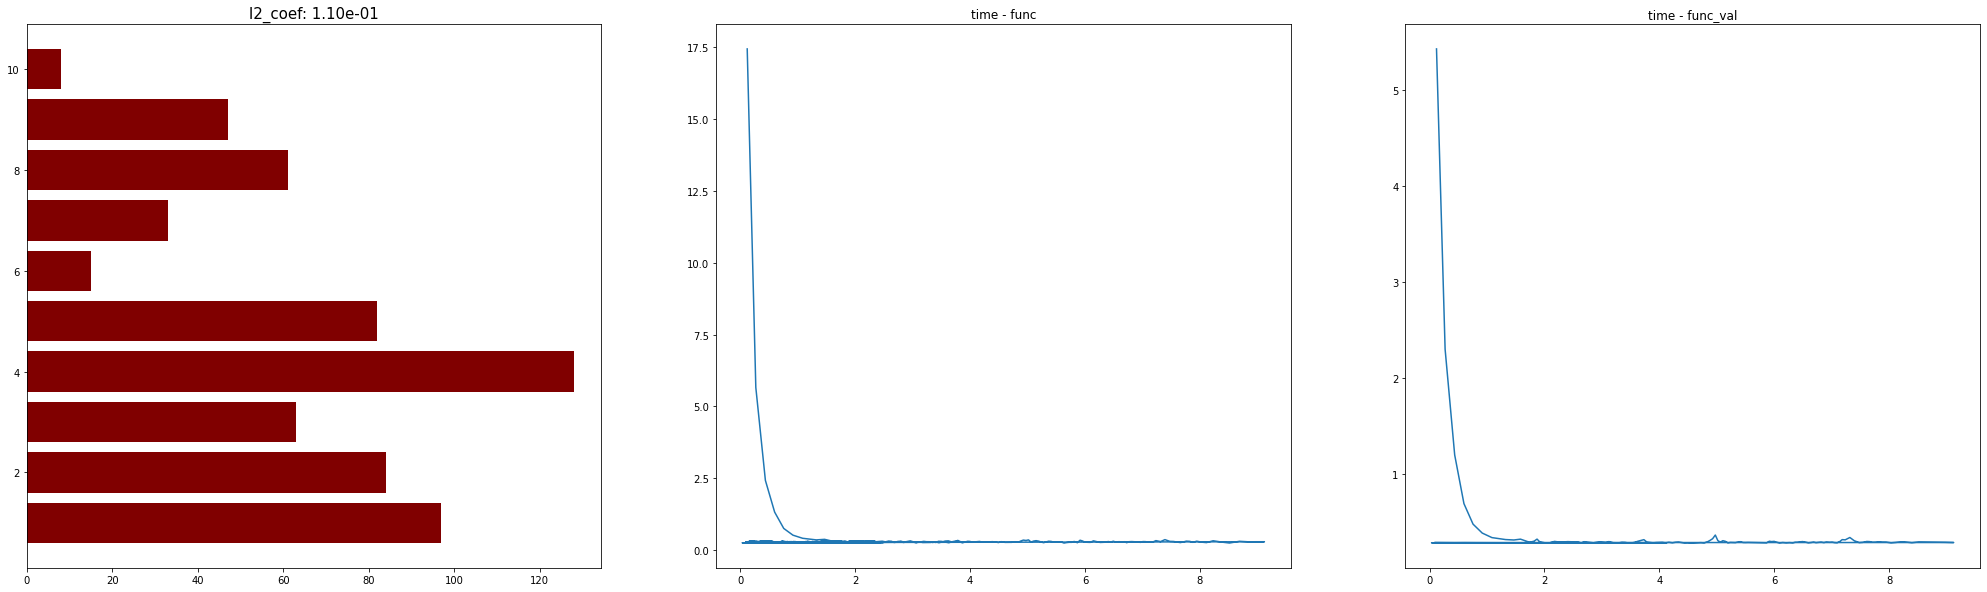

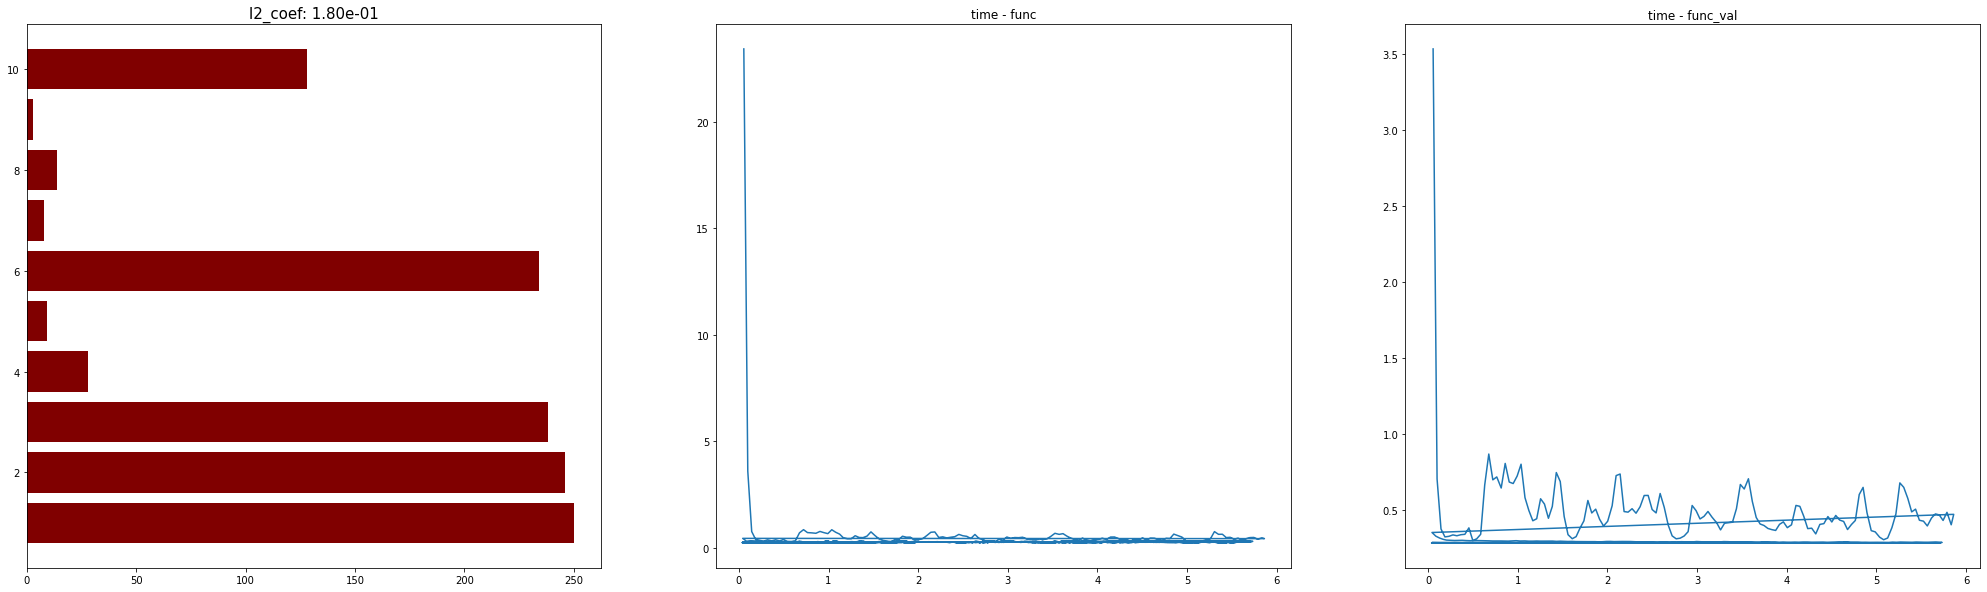

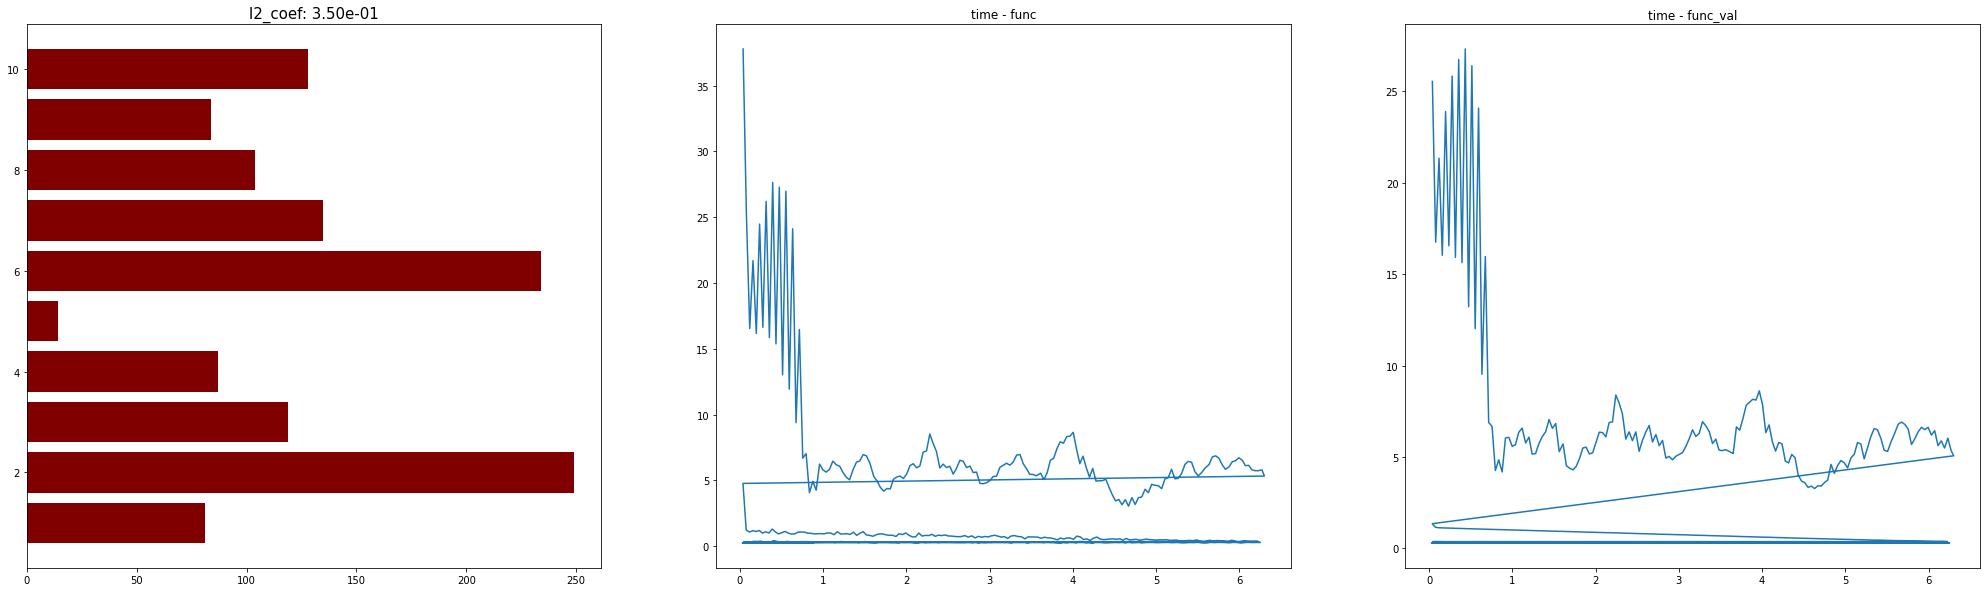

In [14]:
import matplotlib.pyplot as plt

def plot_trial_info(trial, models, history, top_k, l2):
    # your code here
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[35,10])
    ax = ax.flatten()
    weights = list(models.get_weights())
    abs_weights = [abs(num) for num in weights]
    top = sorted(range(len(abs_weights)), key=lambda i: abs_weights[i])[-top_k:]
    nums = [1,2,3,4,5,6,7,8,9,10] 
    ax[0].barh(nums, top, color='maroon')
    #ax[0].bar_label('you ll see labels here')
    ax[0].set_title(f'l2_coef: {l2:.2e}', fontsize=15)

    ax[1].plot(history['time'], history['func'])
    ax[1].set_title('time - func')
    ax[2].plot(history['time'], history['func_val'])
    ax[2].set_title('time - func_val')

    

top_k = 10 
top_trials = ['trial.14', 'trial.40', 'trial.48']
for trial, l2 in zip(top_trials, l2_coef):
    # maybe some code here
    plot_trial_info(tr_his[trial], models=tr_his[trial][1], history=tr_his[trial][0], top_k=top_k, l2=l2)
    plt.show()
    # maybe some code here

Опишите свои наблюдения. Если нужно, подключите визуализацию.

In [ ]:
 #при разных коэф. регуляризации оказываются разными веса
 #разные коэффициенты регуляризации дают разную стабильность в величине лосса с течением времени 

Какой в итоге коэффициент l2-регуляризации будем фиксировать для дальнейших экспериментов? <br>
Ответ объясните :)

In [ ]:
#можно заметить, что наиболее стабильным оказывается коэффициент 0.11. При нём и на тренировочной и на валидационной выборке довольно
#быстро достигается невысокий лосс и продолжает оставаться таким.

### Часть вторая. Research (6 баллов)

Давайте зафиксируем выбранный коэффициент регуляризации и проведем несколько экспериментов с `step_alpha, step_beta, batch_size`. Но для начала посмотрим - возможно, нам удастся уменьшить размер признакового пространства без сильной потери качества, чтобы ускорить наши эксперименты.

Достаньте из словаря модель, соответствующую выбранному вами лучшему trial, и нарисуйте график отсортированных модулей ее весов.

<BarContainer object of 251 artists>

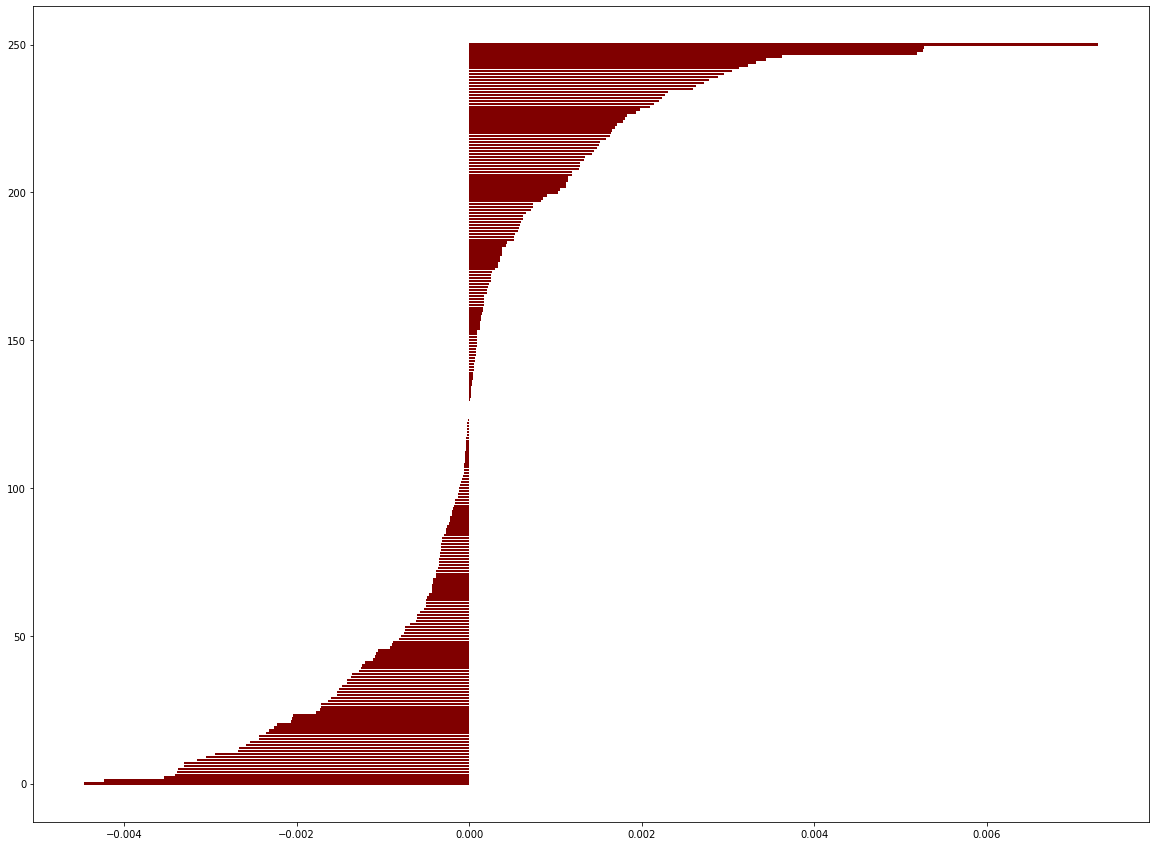

In [15]:
# your code here
model = tr_his['trial.14'][1]
weights = sorted(model.get_weights())
indices = list(range(len(weights)))
plt.figure(figsize=[20, 15])
plt.barh(indices, weights, color='maroon')

Подумайте, можно ли убрать какую-то долю признаков? Если да, то какие признаки вы уберете для дальнейших экспериментов? <br>
Ответ объясните. Могут ли возникнуть какие-то проблемы в дальнейшем?

In [ ]:
#можно попробовать убрать каждый 3ий\4ый признак 
#при потере части информации могут возникнуть проблемы с составлением новых признаков, а так же при интерпретации 
#результатов модели 

#идеально было бы уменьшить признаковую размерность при помощи принципа главных компонент, но пока просто 
#потеряем часть информации 

Напишите новую функцию `research_objective` для перебора `step_alpha, step_beta` при фиксированных `l2_coef, batch_size`. Остальные гиперпараметры оставьте без изменений с прошлого раза. Для перебора step_alpha используйте log-шкалу от 1e-3 до 20, для перебора step_beta - log-шкалу от 0.1 до 5.

Для `batch_size = 300, 1000, 10000, None` запустите по сессии оптимизации на выбранном вами (под)множестве признаков, собирая каждый `study` в словарик по ключу batch_size. Используйте `n_trials = 200`, TPESampler с параметром `n_startup_trials = 100`.<br>

In [17]:
# your code here
def research_objective(trial, X_tr, y_tr, X_val, y_val, batch_size):
    # your code here
    step_alpha = trial.suggest_loguniform('alpha', 1e-3, 20)
    step_beta = trial.suggest_loguniform('beta', 0.1, 5)

    blogloss = BinaryLogisticLoss(l2_coef=0.11)
    model = LinearModel(blogloss, batch_size=batch_size, step_alpha=step_alpha, step_beta=step_beta, tolerance=1e-4, max_iter=30, random_seed=911)
    model.fit(X_tr, y_tr)

    obj = model.get_objective(X_val, y_val)

    return obj 

def start_optimization(
    objective_func, 
    n_trials,
    n_jobs, batch_size,
    X_train, X_val, y_train, y_val,
    study_direction=None,
    study_directions=None,
    sampler=None,
    prep=None,
    features=None,
    **other_objective_kwargs
      ): 

    study = optuna.create_study(direction=study_direction, sampler=sampler)
    obj = lambda trial: objective_func(trial, X_train, y_train, X_val, y_val, batch_size)
    study.optimize(func=obj, n_trials=n_trials, timeout=None, n_jobs=n_jobs)

    return study 

import optuna
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=100, n_ei_candidates=24, gamma=gamma)

batches = [300, 1000, 10000, None]
batch_dict = {}

for batch in batches: 
  study = start_optimization(research_objective, n_trials=20, n_jobs=3, X_train=X_train, X_val=X_val, y_train=y_train,
                           y_val=y_val, study_direction='minimize', sampler = tpe_sampler, batch_size=batch)
  batch_dict[str(batch)] = study
    

[I 2022-11-25 22:11:45,363] A new study created in memory with name: no-name-8fd4dac7-b12e-436b-9f21-38cd3d117707
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-11-25 22:12:02,439] Trial 1 finished with value: 0.2849450720246032 and parameters: {'alpha': 0.6097870411523588, 'beta': 0.2309290187974802}. Best is trial 1 with value: 0.2849450720246032.
[I 2022-11-25 22:12:33,915] Trial 0 finished with value: 258.0636745024724 and parameters: {'alpha': 12.071665721917347

Используя `optuna.visualization.plot_contour`, нарисуйте график зависимости `step_alpha - step_beta - objective`. Используйте аргумент `target`, чтобы обрезать значения лоссов, которые портят тепловую карту. <br>
Для каждого `batch_size` выведите такой график в отдельной ячейке.

In [23]:
def clipper_example(frozen_trial):
    max_value = ...
    return min(frozen_trial.value, max_value)

# your code here
optuna.visualization.plot_contour(batch_dict['300'], params=['alpha', 'beta'])

In [24]:
optuna.visualization.plot_contour(batch_dict['1000'], params=['alpha', 'beta'])

In [25]:
optuna.visualization.plot_contour(batch_dict['10000'], params=['alpha', 'beta'])

In [26]:
optuna.visualization.plot_contour(batch_dict['None'], params=['alpha', 'beta'])

Опишите подробно все свои наблюдения.

In [ ]:
#Несмотря на то, что самый лучший лосс был получен на испытании с отсутствием батчей, наиболее часто низкие значения 
#встречаются при наибольшем делении датасета на батчи (то есть при размере батча = 300), такое может получится за счёт того, 
#что лосс считается больше в n раз и вероятность прийти к более оптимальному становится выше. 

#также можно заметить, что наиболее удачные лоссы встречаются на трайалах с маленьким значением step_alpha (если бить на батчи, 
# при отсутствии разбиения на батчи видимо более случайно) и уже при более разнообразном step_beta 

Мы поставили довольно большое значение `n_startup_trials` в TPESampler. Как думаете, для чего?

In [ ]:
#кажется в случае с стохастическим градиентным спуском какую-то роль играет случайность. возможно с бОльшим количеством
#случайных стартап трайалов, выше вероятность наткнуться на те значения, которые будут наиболее оптимальны для градиентного спуска

Обучите по модели для каждого `batch_size` с лучшими `step_alpha, step_beta`. Соберите историю, сложите все в словари по ключу batch_size.

In [28]:
# your code here
batches = [300, 1000, 10000, None]

batch_his = {}

for batch in batches: 
    blogloss = BinaryLogisticLoss(l2_coef=0.11)
    model = LinearModel(blogloss, batch_size=batch, step_alpha=2.14, step_beta=1.04,
                    tolerance=1e-4, max_iter=30, random_seed=911, trace=True)
    history =  model.fit(X=X_train, y=y_train, w_0=None, trace=True, X_val=X_val, y_val=y_val)
    name = 'batch' + str(batch)
    batch_his[name] = [history, model] 

Визуализируйте результаты эксперимента. Нарисуйте графики `time-loss`, `epoch-loss`, `epoch-learning_rate` для каждого `batch_size`. <br>
На графике `epoch-loss` должно быть каким-либо образом отображено среднее время эпохи для каждого размера батча. <br>
Под `learning_rate` имеется в виду:
$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $k$ - номер итерации (эпохи)}$$

Убедитесь, что различия между графиками, относящимися к разным `batch_size`, хорошо видны.

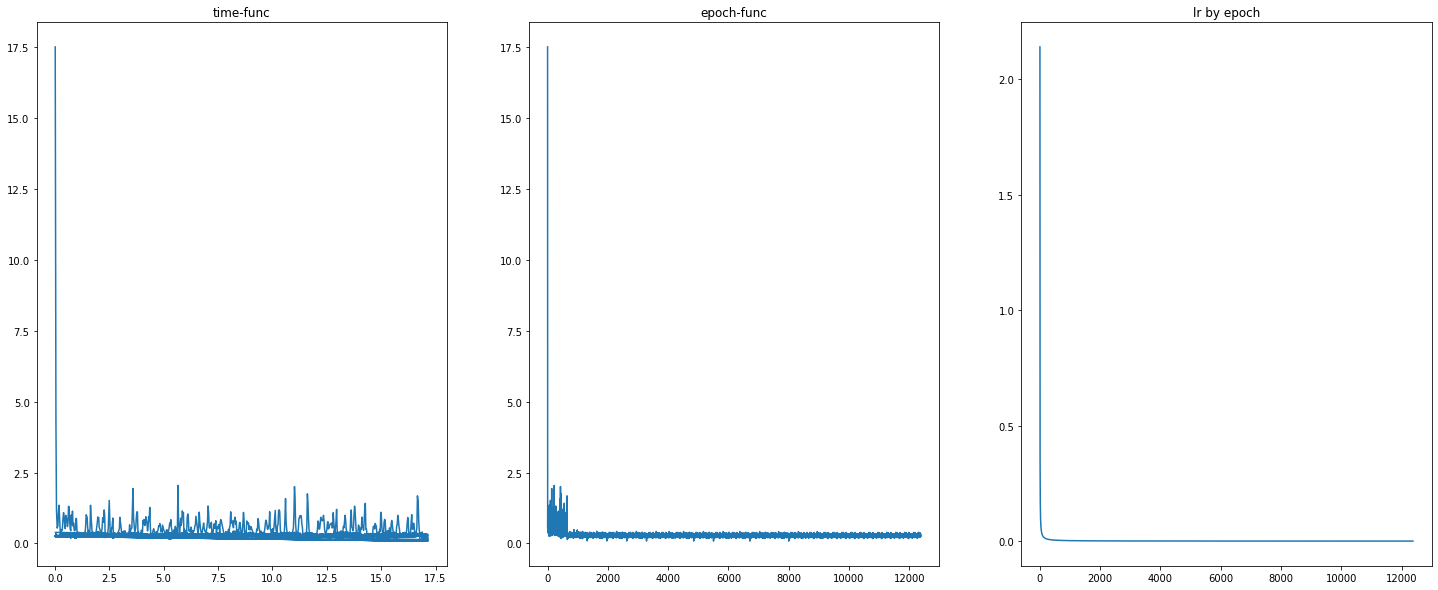

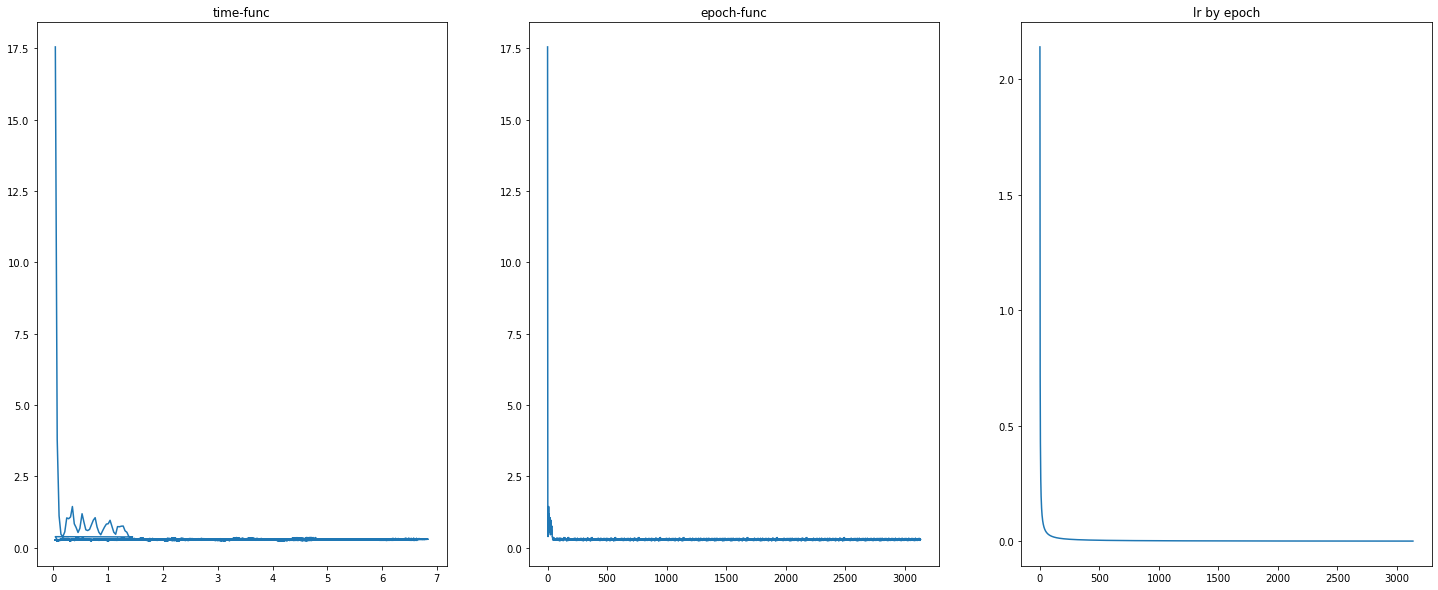

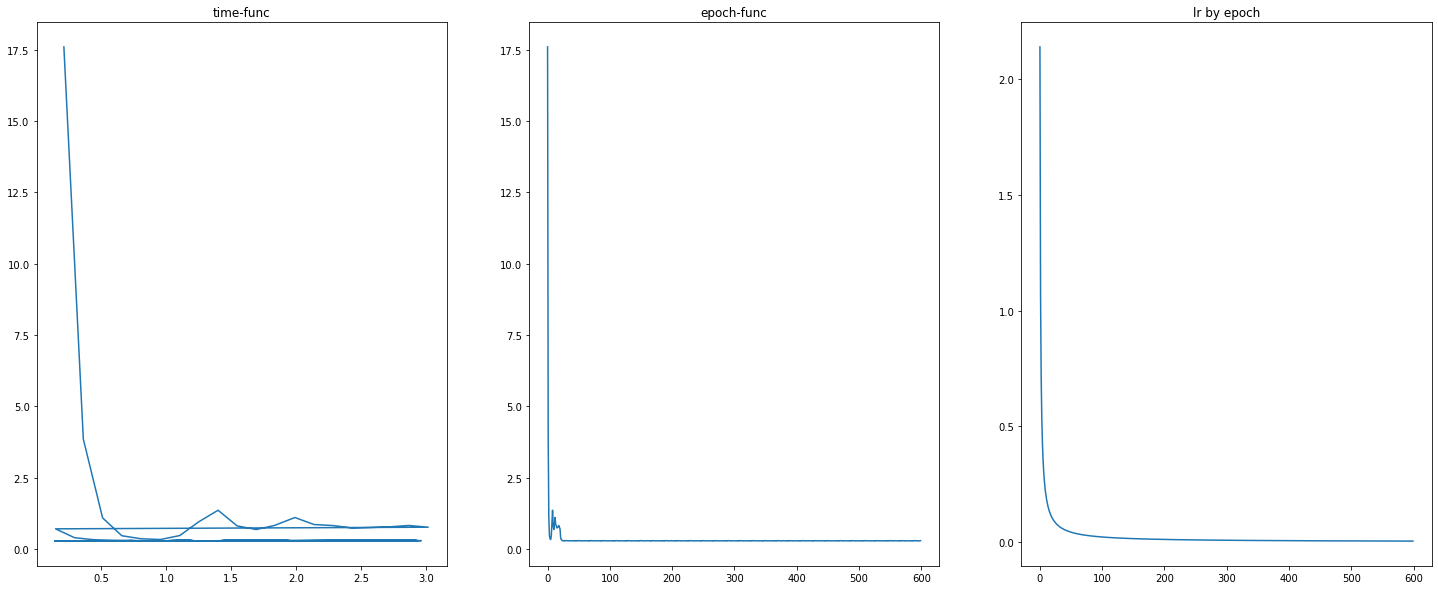

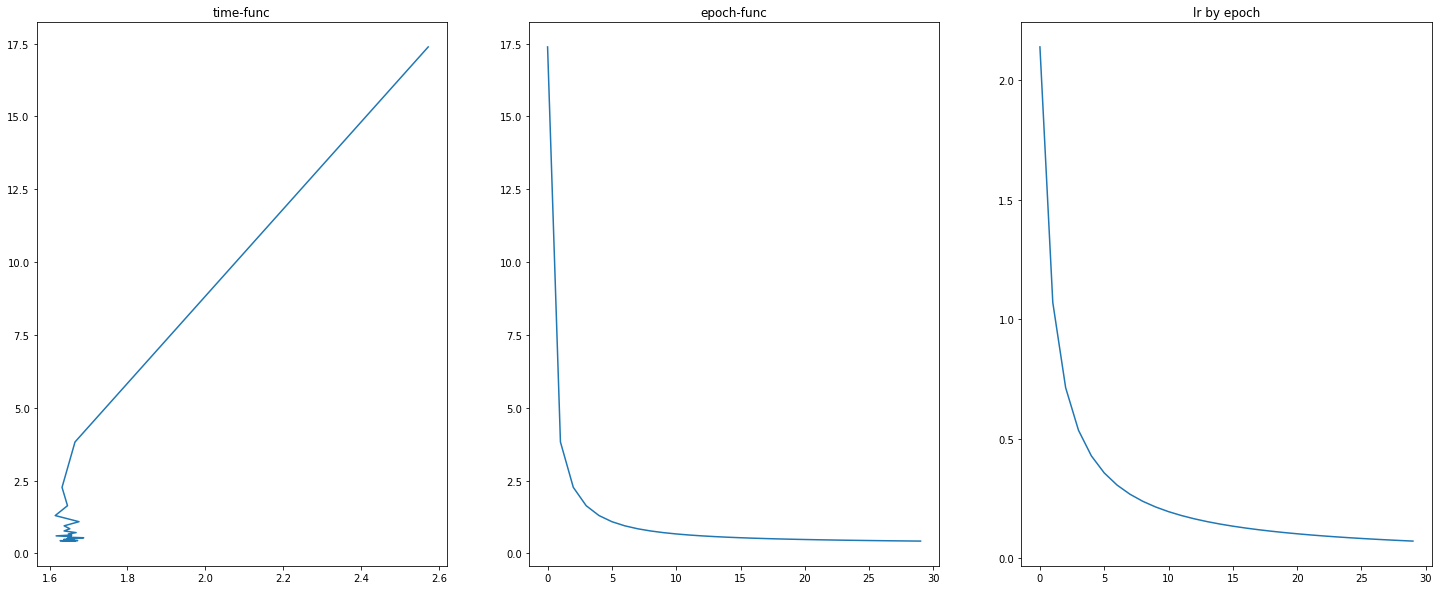

In [36]:
# your code here
def vizual(models, history, alpha, beta): 
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[25,10])
    ax[0].plot(history['time'], history['func'])
    ax[0].set_title('time-func')
    epoch = list(range(len(history['func'])))
    ax[1].plot(epoch, history['func'])
    ax[1].set_title('epoch-func')
    lr_lis = []
    for i in range(len(epoch)): 
        lr = alpha/(i+1 ** beta)
        lr_lis.append(lr)
    ax[2].plot(epoch, lr_lis)
    ax[2].set_title('lr by epoch')

for batch in batches: 
   vizual(batch_his['batch' + str(batch)][1], batch_his['batch' + str(batch)][0], 2.14, 1.04)
   plt.show()


Какие выводы можно сделать из увиденного?

In [ ]:
#довольно однообразно уменьшает learning rate, имеет в целом похожую кривую. 
#то же самое касается и значении лосса на валидации в зависимости от времени. При маленьком размере батча сначала лосс немного 
#прыгает, но потом стабилизируется
#интереснее ведут себя графики зависимости лосса от времени. Во-первых, они менее однородные, особенно интересен график при отсутствии
#батчей, на котором можно заметить что бОльшее время результируется в бОльший лосс. 

### Часть третья. Метрика (4 балла)

Настало время проверить, во что вылились наши усилия. Посмотрим на метрику `sklearn.metrics.balanced_accuracy_score`.

Выберите по графикам выше оптимальные параметры для вашей финальной модели. Посчитайте для этой модели значение `balanced_accuracy` на обучающей, валидационной и тестовой выборках. Используйте `model.get_optimal_threshold` для подсчета порога бинаризации.

In [8]:
from sklearn.metrics import balanced_accuracy_score

# your code here
blogloss = BinaryLogisticLoss(l2_coef=0.11)
model = LinearModel(blogloss, batch_size=300, step_alpha=2.14, step_beta=1.04,
                    tolerance=1e-4, max_iter=30, random_seed=911, trace=True)
model.fit(X=X_train, y=y_train, w_0=None)
threshold = model.get_optimal_threshold(X_val, y_val)
y_pred = model.predict(X_val, threshold)
balanced_accuracy_score(y_val, y_pred)

0.5

Что скажете?

In [ ]:
#получилось не очень хорошо, возможно есть ошибки в подборе гиперпараметров, также явно не хватает предобработки данных

В качестве послесловия предлагается на обсуждение вопрос, который мог возникнуть еще в самом начале экспериментов: почему мы подбираем гиперпараметры по лоссу, если в результате мы хотим получить модель с лучшим показателем метрики `balanced_accuracy`? Первое, что хочется ответить, так это то, что каждый раз подбирать оптимальный порог и считать метрику дольше, чем просто посчитать лосс.

  Замерьте время подсчета лосса и подбора оптимального порога + подсчет метрики, [используя](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%timeit` или `%%timeit`.

In [49]:
# your code here
import time 
start = time.process_time()
model.get_objective(X_val, y_val)
model.get_optimal_threshold(X_val, y_val)
balanced_accuracy_score(y_val, y_pred)
end = time.process_time()

print(end - start)

0.6284286699992663


Подумайте (и напишите), есть ли другие причины, по которым использовать `balanced_accuracy` в нашем процессе подбора гиперпараметров не стоит?

In [ ]:
#кажется, что метрика loss наиболее универсальна, так как изначальная задача - уменьшить её в ходе градиентного спуска. Подбирая 
#гиперпараметры для loss мы в любом случае улучшаем показатели модели для любой последующей оценки модели 

По логике, уменьшение лосса есть "улучшение качества работы алгоритма", как и увеличение нашей метрики. Может быть, мы имели право перебирать гиперпараметры по лоссу, даже если на самом деле хотели от модели лишь `balanced_accuracy` побольше?

Давайте проверим. Напишите функцию `multiobjective`, которая перебирает `step_alpha, step_beta`. Зафиксируйте все остальное на адекватных значениях, согласно предыдущим экспериментам. Функция должна возвращать tuple `(loss, balanced_acc_score)` - лосс и balanced_accuracy_score с подбором оптимального порога, полученные на валидации.

In [6]:
# your code here
def multiobjective(trial, X_train, X_val, y_train, y_val): 
    step_alpha = trial.suggest_float('alpha', 1, 5, step=0.1)
    step_beta = trial.suggest_float('beta', 1, 5, step=0.1)
    blogloss = BinaryLogisticLoss(l2_coef=0.4)
    model = LinearModel(blogloss, batch_size=300, step_alpha=step_alpha, step_beta=step_beta, tolerance=1e-4, max_iter=30, random_seed=911)
    model.fit(X_train, y_train)

    obj = model.get_objective(X_val, y_val)
    threshold = model.get_optimal_threshold(X_val, y_val)
    y_pred = model.predict(X_val, threshold)
    score = balanced_accuracy_score(y_val, y_pred)
    res = (obj, score)

    return res 


Optuna [позволяет](https://optuna.readthedocs.io/en/stable/tutorial/20_recipes/002_multi_objective.html#sphx-glr-tutorial-20-recipes-002-multi-objective-py) оптимизировать `multiobjective-функции`, которые возвращают больше одного аргумента.

Запустите сессию оптимизации с сэмплером по умолчанию. Используйте 100-300 `n_trials`, `study_directions = ['minimize', 'maximize']`.

In [9]:
# your code here
import optuna 
from sklearn.metrics import balanced_accuracy_score

gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(directions = ['minimize', 'maximize'], sampler=tpe_sampler)
obj = lambda trial: multiobjective(trial, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
study.optimize(func=obj, n_trials=30, timeout=None, n_jobs=3)



[I 2022-11-27 09:12:58,981] A new study created in memory with name: no-name-3f558976-fce0-44da-88c2-376ad88d1d97
[I 2022-11-27 09:13:31,745] Trial 1 finished with values: [0.2859952096106637, 0.5] and parameters: {'alpha': 1.0, 'beta': 2.9000000000000004}. 
[I 2022-11-27 09:13:49,385] Trial 0 finished with values: [0.28861414217694703, 0.5] and parameters: {'alpha': 1.6, 'beta': 2.7}. 
[I 2022-11-27 09:14:26,864] Trial 4 finished with values: [0.28637982502398945, 0.5] and parameters: {'alpha': 1.9, 'beta': 2.8}. 
[I 2022-11-27 09:15:31,100] Trial 2 finished with values: [56.84202767900421, 0.5] and parameters: {'alpha': 2.7, 'beta': 1.7000000000000002}. 
[I 2022-11-27 09:16:41,018] Trial 3 finished with values: [0.54758663258277, 0.5] and parameters: {'alpha': 2.0, 'beta': 4.6}. 
[I 2022-11-27 09:17:16,511] Trial 7 finished with values: [0.28938602404408775, 0.5] and parameters: {'alpha': 1.2, 'beta': 4.800000000000001}. 
/content/modules/losses.py:43: RuntimeWarning: overflow encoun

С помощью `optuna.visualization.plot_pareto_front` визуализируйте результаты сессии. В разных ячейках используйте разные значения аргумента `include_dominated_trials`. Используйте зум для выделения наглядной зоны, если необходимо. Подпишите ваши objectives с помощью аргумента `target_names`.

In [10]:
# your code here

optuna.visualization.plot_pareto_front(study, include_dominated_trials = True)

In [11]:
# your code here
optuna.visualization.plot_pareto_front(study, include_dominated_trials = False)

Что вы можете сказать об увиденном?

In [ ]:
# оптимизироовать accuracy не очень получилось, но получились примерно похожие результаты оптимизации как на предыдущих. 
# однако лучший лосс 0.28< не был достигнут 

Ура! А теперь...

## Бонусная часть. Постигая ASHA (7 баллов)

В бонусной части забудем датасет и линейные модели! Вам предстоит наглядно убедиться и разобраться в том, как работает `optuna.pruners.SuccessiveHalvingPruner`, он же **ASHA**. Важно понимать, как устроены `optuna.pruners` - правильное их использование заметно сократит время ожидания и может улучшить качество.

В вашем распоряжении семинар, документация и исходный код классов в `optuna`.

### 0
Начнем с простого - будем использовать предложенный простенький `objective`, чтобы убедиться, что все `trials` успешно доходят до конца.

Все указанные параметры не изменяйте в дальнейшем, если этого не просят в задании.

In [ ]:
def objective_0(trial):
    for i in range(31):
        trial.report(val=trial.number, step=i)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return 0

pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=2, reduction_factor=2,
                                                bootstrap_count=0, min_early_stopping_rate=0)
study = optuna.create_study(direction='maximize', pruner=pruner)

study.optimize(objective_0, n_trials=16, n_jobs=4)

Давайте визуализируем наш `study`. Напишите функцию `plot_study_info`, отрисовывающую жизненный путь всех `trials`. Используйте данный ниже шаблон. Под визулизацией будем понимать нечто похожее на картинки с семинара:

- ось Х - `step`, ось Y - `trial.number`.

- каждый trial - горизонтальная синяя прямая от -1 до `trial.last_step`.

- если trial [дошел до конца](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.TrialState.html#optuna.trial.TrialState), на конце прямой поставьте зеленый кружок, если обрезался - красный крестик [`plt.scatter(..., marker=...)`].

- синяя вертикальная прямая на отметке `step = 0` - "день рождения" trial.

- черными вертикальными прямыми расставьте `rungs`. Воспользуйтесь [исходным кодом](https://optuna.readthedocs.io/en/stable/_modules/optuna/pruners/_successive_halving.html#SuccessiveHalvingPruner) `SuccessiveHalvingPruner` для выяснения всех обстоятельств.

- зелеными вертикальными линиями отметьте те `steps`, на которых делается `trial.report`. Сделайте так, чтобы эти линии были видны поверх линий, обозначающих `rungs`, если такие случаи будут иметь место.

- что еще хотите от себя! Учтите, что trials после сессии оптимизации являются [`FrozenTrials`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.FrozenTrial.html#optuna.trial.FrozenTrial).

Пожалуйста, уделите должное внимание этой функции и отладьте ее. Убедитесь, что все хорошо видно, что все адекватного размера. Вы будете ее часто использовать далее.

In [ ]:
def plot_study_info(study, min_resource, max_resource, gamma, early_stopping=0, *your_args, **your_kwargs):
    # your code here
    pass

Визуализируйте первую сессию, используя вашу фукнцию. Что в данном случае такое `max_resource`?

In [ ]:
# your code here

Почему все trials дошли до конца?

### 1

Напишите новый `objective` - попробуйте порепортить случайные значения, устроив беспорядок. Создайте новый `study` и запустите сессию оптимизации с теми же параметрами. Визуализируйте процесс и убедитесь, что все правильно. Далее, эту цепочку будем называть "запустите и визуализируйте".

In [ ]:
# your code here

Что-нибудь интересное на картинке?

### 2

Теперь напишите еще один `objective` - все должны дойти до конца, но теперь не по порядку, то есть i-й по скорости trial не должен иметь `trial.number = i - 1`. Запустите и визуализируйте.

In [ ]:
# your code here

Объясните, как вы добились того, что trials заканчивают не по порядку.

### 3

Оставьте прошлый `objective` и положите `bootstrap_count=2`. Запустите и визуализируйте.

In [ ]:
# your code here

Как в итоге работает этот аргумент?

### 4

Напишите новый `objective`, чтобы `trial.report` не всегда приходился на `step = rung`. Запустите и визуализируйте.

In [ ]:
# your code here

Объясните увиденное

### 5

Используя предыдущий `objective`, запустите сессии с аргументом прунера `min_early_stopping = 0, 1, 2, 3`.

Визуализируйте их друг под другом. Если к этому моменту вы убедились, что ваша рисовалка работает правильно, используйте `optuna.logging.set_verbosity`, чтобы скрыть вывод о ходе сессии.

In [ ]:
# your code here

Объясните, за что отвечает этот аргумент и при чем здесь `early_stopping`.

### 6

Мы достигли достаточного уровня мастерства чтобы визуализировать `optuna.pruners.HyperbandPruner`! `Hyperband` создает несколько `brackets`, отправляя тот или иной trial в тот или иной `bracket` по хэшу. Подробнее - см. семинар, 
[описание](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.HyperbandPruner.html) или 
[исходный код](https://optuna.readthedocs.io/en/stable/_modules/optuna/pruners/_hyperband.html#HyperbandPruner).

Используя `objective` на ваш вкус, создайте новый `study` с `HyperbandPruner`. Подберите `max_resource` так, чтобы получилось 4 брэкета. На что еще влияет `max_resource` в `HyperbandPruner`?

Запустите и визуализируйте брэкеты друг под другом. Если нужно, напишите новую фукнцию для отрисовки брэкетов по `study`, хотя по сути - прошлая функция как раз отрисовывала один брэкет; возможно, можно лишь немного изменить её.

In [ ]:
# your code here

Опишите свои наблюдения.

### 7. Босс!

Отрисуйте слепки одного брэкета (используйте `ASHA`) в режиме реального времени, используя `ask-tell` интерфейс вместо `study.optimize`. Например, вы можете рисовать состояние брэкета (в данном случае, `study = bracket`) когда появляется каждый второй trial. Используйте `time.sleep` для того чтобы сделать картинку интереснее. Подумайте, как лучше отрисовывать, чтобы хорошо было видно развитие сюжета. Если нужно, используйте другую функцию для отрисовки. 

In [ ]:
# your code here

Опишите свои наблюдения.

Еще одно ура! Как впечатления?